# Classic U-Net segmentation model: Evaluation and Analysis

### Setup: Load Runs into a DataFrame

In [ ]:
import wandb
import pandas as pd

ENTITY = "tkshfj-bsc-computer-science-university-of-london"
PROJECT = "classic_unet_segmentation"
SWEEP_ID = "1jpj8b17"  # Replace this with ep ID (see previous reply)

api = wandb.Api()

# Fetch runs in this sweep
# runs = api.runs(f"{ENTITY}/{PROJECT}", filters={"sweep": {"$eq": SWEEP_ID}})
runs = api.runs(f"{ENTITY}/{PROJECT}")

records = []
for run in runs:
    data = {**run.summary, **run.config}
    data["run_name"] = run.name
    data["run_id"] = run.id
    data["state"] = run.state
    data["url"] = run.url
    # Remove internal keys
    data = {k: v for k, v in data.items() if not k.startswith("_")}
    records.append(data)

df = pd.DataFrame(records)
print(df.head())


   best_epoch  best_val_loss  dice_coefficient  epoch  \
0        11.0       1.160207          0.536665   21.0   
1        30.0       1.164538          0.535051   39.0   
2        12.0       1.157380          0.540618   22.0   
3        23.0       1.157063          0.541385   33.0   
4         5.0       1.162251          0.525681   15.0   

                                               graph  iou_metric      loss  \
0  {'_type': 'graph-file', 'path': 'media/graph/g...    0.371831  1.163895   
1  {'_type': 'graph-file', 'path': 'media/graph/g...    0.369880  1.169064   
2  {'_type': 'graph-file', 'path': 'media/graph/g...    0.372856  1.163411   
3  {'_type': 'graph-file', 'path': 'media/graph/g...    0.373548  1.162223   
4  {'_type': 'graph-file', 'path': 'media/graph/g...    0.361087  1.187068   

   test_dice  test_iou  test_loss  ...  epochs    l2_reg   dropout batch_size  \
0   0.545802  0.380097   1.156727  ...      40  0.000327  0.173666          4   
1   0.536157  0.370668   1

### Find the Best Hyperparameters

In [ ]:
# Change 'val_accuracy
best_run = df.loc[df['iou_metric'].idxmax()]
print("Best Run:")
print(best_run)

print("URL:", best_run["url"])

Best Run:
best_epoch                                                           39.0
best_val_loss                                                    1.100613
dice_coefficient                                                 0.571185
epoch                                                                39.0
graph                   {'_type': 'graph-file', 'path': 'media/graph/g...
iou_metric                                                       0.401054
loss                                                             1.109313
test_dice                                                        0.576679
test_iou                                                         0.406116
test_loss                                                        1.095946
val_dice_coefficient                                             0.568992
val_iou_metric                                                   0.399307
val_loss                                                         1.100613
task                        

### Find the Best Model

In [7]:
best_run = df.loc[df['val_dice_coefficient'].idxmax()]
print("Best Hyperparameters and Result:")
print(best_run[['batch_size', 'learning_rate', 'dropout', 'l2_reg', 'val_dice_coefficient', 'url']])

Best Hyperparameters and Result:
batch_size                                                             16
learning_rate                                                    0.000235
dropout                                                          0.175796
l2_reg                                                           0.000216
val_dice_coefficient                                             0.572673
url                     https://wandb.ai/tkshfj-bsc-computer-science-u...
Name: 10, dtype: object


### Visualize Effect of Hyperparameters on Performance

##### Discrete Parameter (batch_size)

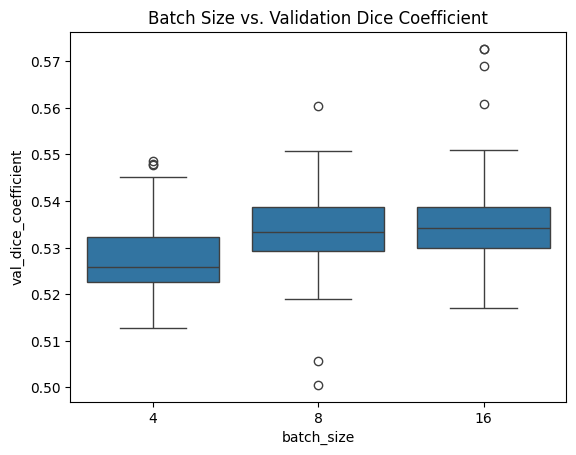

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='batch_size', y='val_dice_coefficient', data=df)
plt.title('Batch Size vs. Validation Dice Coefficient')
plt.show()

##### Continuous Parameters

##### Learning Rate

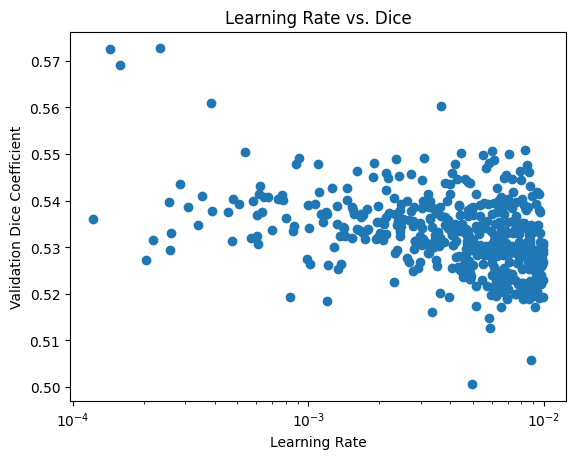

In [9]:
plt.scatter(df['learning_rate'], df['val_dice_coefficient'])
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Dice Coefficient')
plt.title('Learning Rate vs. Dice')
plt.show()

##### Dropout

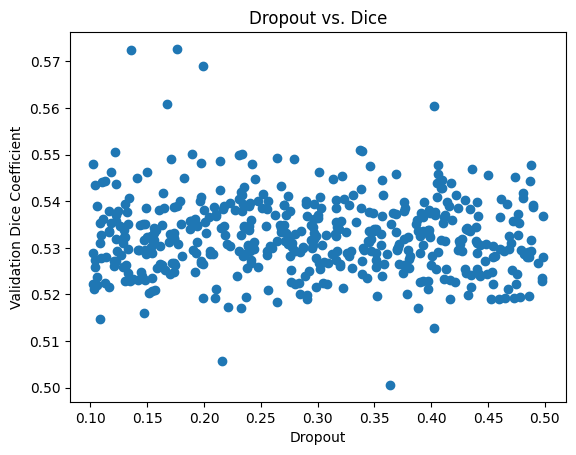

In [10]:
plt.scatter(df['dropout'], df['val_dice_coefficient'])
plt.xlabel('Dropout')
plt.ylabel('Validation Dice Coefficient')
plt.title('Dropout vs. Dice')
plt.show()

##### L2 Regularization

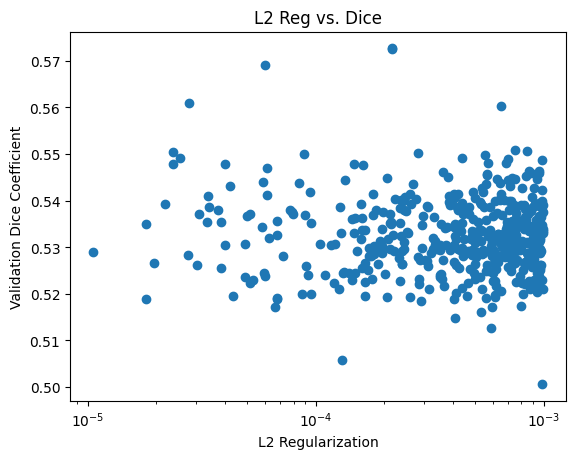

In [11]:
plt.scatter(df['l2_reg'], df['val_dice_coefficient'])
plt.xscale('log')
plt.xlabel('L2 Regularization')
plt.ylabel('Validation Dice Coefficient')
plt.title('L2 Reg vs. Dice')
plt.show()

### Aggregate Results (e.g., Group by a Hyperparameter)

In [ ]:
agg = df.groupby('learning_rate')['val_accuracy'].agg(['mean', 'std', 'max', 'count'])
print(agg)

### Plot Metric vs. Hyperparameter

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for dropout vs. val_accuracy
plt.scatter(df['dropout'], df['val_accuracy'])
plt.xlabel('Dropout')
plt.ylabel('Validation Accuracy')
plt.title('Dropout vs. Validation Accuracy')
plt.show()

# Scatter plot for learning_rate vs. val_accuracy (use log-scale if rates vary a lot)
plt.scatter(df['learning_rate'], df['val_accuracy'])
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Learning Rate vs. Validation Accuracy')
plt.show()

### Analyze Top N Runs

In [12]:
top_n = 10
top = df.sort_values('val_dice_coefficient', ascending=False).head(top_n)
print(top[['batch_size', 'learning_rate', 'dropout', 'l2_reg', 'val_dice_coefficient', 'url']])

     batch_size  learning_rate   dropout    l2_reg  val_dice_coefficient  \
10           16       0.000235  0.175796  0.000216              0.572673   
436          16       0.000144  0.135827  0.000217              0.572535   
13           16       0.000159  0.198853  0.000060              0.568992   
439          16       0.000386  0.167117  0.000028              0.560879   
229           8       0.003653  0.402626  0.000653              0.560361   
408          16       0.008311  0.337013  0.000747              0.550887   
419           8       0.006034  0.338677  0.000849              0.550748   
362          16       0.000537  0.121749  0.000024              0.550517   
219           8       0.004456  0.233020  0.000280              0.550114   
364          16       0.007117  0.189434  0.000089              0.550102   

                                                   url  
10   https://wandb.ai/tkshfj-bsc-computer-science-u...  
436  https://wandb.ai/tkshfj-bsc-computer-science

### Aggregate by Batch Size (or Other Parameter)

In [13]:
agg = df.groupby('batch_size')['val_dice_coefficient'].agg(['mean', 'std', 'max', 'count'])
print(agg)

                mean       std       max  count
batch_size                                     
4           0.527806  0.007284  0.548700    151
8           0.533991  0.007233  0.560361    171
16          0.535436  0.008489  0.572673    158


### Parallel Coordinates for Multivariate Exploration

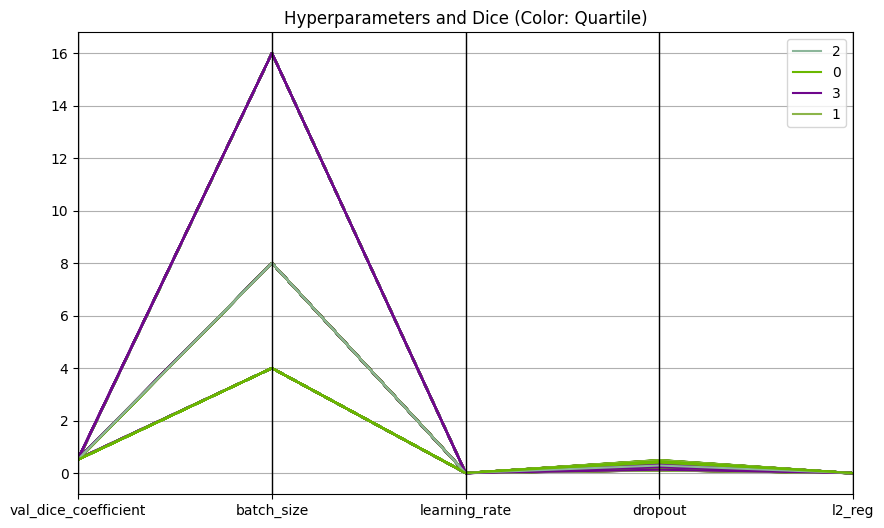

In [14]:
from pandas.plotting import parallel_coordinates

cols = ['val_dice_coefficient', 'batch_size', 'learning_rate', 'dropout', 'l2_reg']
data = df[cols].dropna()
# Discretize Dice for coloring
data['dice_cat'] = pd.qcut(data['val_dice_coefficient'], 4, labels=False)

plt.figure(figsize=(10,6))
parallel_coordinates(data, 'dice_cat')
plt.title('Hyperparameters and Dice (Color: Quartile)')
plt.show()

### Find the Most Consistent Hyperparameter

In [15]:
print(df[['val_dice_coefficient', 'learning_rate', 'dropout', 'l2_reg']].corr())

                      val_dice_coefficient  learning_rate   dropout    l2_reg
val_dice_coefficient              1.000000      -0.373620 -0.062981 -0.034086
learning_rate                    -0.373620       1.000000  0.046442  0.031735
dropout                          -0.062981       0.046442  1.000000  0.019478
l2_reg                           -0.034086       0.031735  0.019478  1.000000


### Export Data to CSV/Excel

In [16]:
df.to_csv("wandb_sweep_results.csv", index=False)

### Summary: How to Evaluate

- Best config: Look for the run with the max val_dice_coefficient.

- Parameter impact: Plot Dice vs. each hyperparameter, aggregate results by batch size.

- Top runs: Print best runs for easy model checkpoint access.

- Multivariate effects: Use parallel coordinates to view how combinations affect performance.